# Sales Data Analysis

This project analyzes a sample sales dataset to discover trends in revenue, product performance, and customer behavior. I perform data cleaning, feature extraction, exploratory data analysis, and generate insights to support decision-making.

In [98]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set(style="whitegrid")


In [ ]:
# Load dataset

df = pd.read_csv("../data/sales_data_sample.csv", encoding='ISO-8859-1')

# View the first few rows
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## Data Inspection

Initial look at the dataset: columns, data types, basic stats, and missing values.


In [100]:
# Columns and types
print("Columns:", df.columns.tolist())
print()

df.info()

# Basic statistics
df.describe()

# Shape
print("Shape:", df.shape)

# Check missing values
df.isnull().sum()

Columns: ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-n

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

## Data Cleaning

Remove unnecessary columns and convert date formats for time-based analysis .


In [101]:
# Drop columns with many missing or irrelevant for analysis
df.drop(['ADDRESSLINE2', 'STATE', 'TERRITORY', 'POSTALCODE'], axis=1, inplace=True)

# Drop irrelevant or redundant features
df.drop(['PHONE', 'ADDRESSLINE1', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'ORDERLINENUMBER'], axis=1, inplace=True)

# Convert ORDERDATE to datetime
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Check shape after cleanup
df.shape


(2823, 16)

## Feature Engineering

We extract time-based features to help with trend analysis.


In [102]:
df['ORDER_YEAR'] = df['ORDERDATE'].dt.year   #extracting year from date
df['ORDER_MONTH'] = df['ORDERDATE'].dt.month
df['ORDER_DAY'] = df['ORDERDATE'].dt.day
df['ORDER_MONTH_NAME'] = df['ORDERDATE'].dt.strftime('%B')

## Exploratory Data Analysis (EDA)

**Total Sales Per Year**

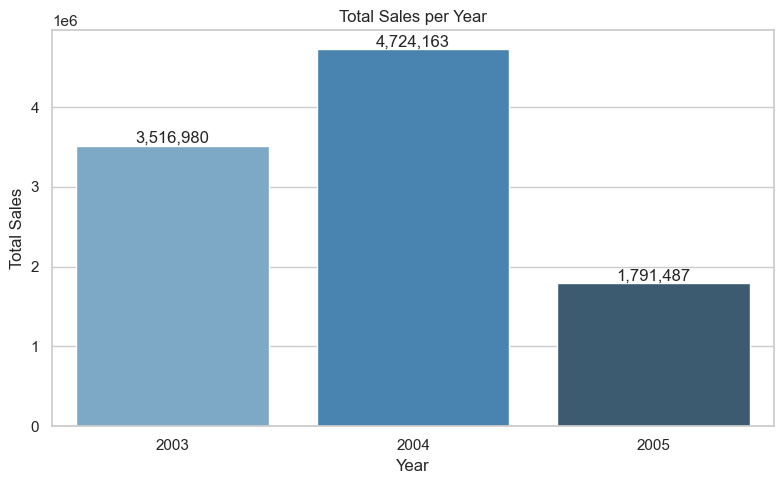

In [103]:
# Group the data by year and calculate the total sales
yearly_sales = df.groupby('ORDER_YEAR')['SALES'].sum().reset_index()

# Plot it
plt.figure(figsize=(8,5))
ax = sns.barplot(x='ORDER_YEAR', y='SALES', data=yearly_sales, palette='Blues_d')

# Add values on top of bars
for bar in ax.patches:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.0f}', ha='center', va='bottom')

plt.title("Total Sales per Year")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()


#### Insights:
- **2004** had the highest total sales, crossing **$4.7 million.**
- **2003** also performed strongly with over **$3.5 million.**
- **2005** showed a significant drop in sales — possibly due to fewer orders or incomplete data.
- This year-over-year trend helps the company **evaluate historical performance** and identify **growth or decline periods**.


**Sales by Product Line**

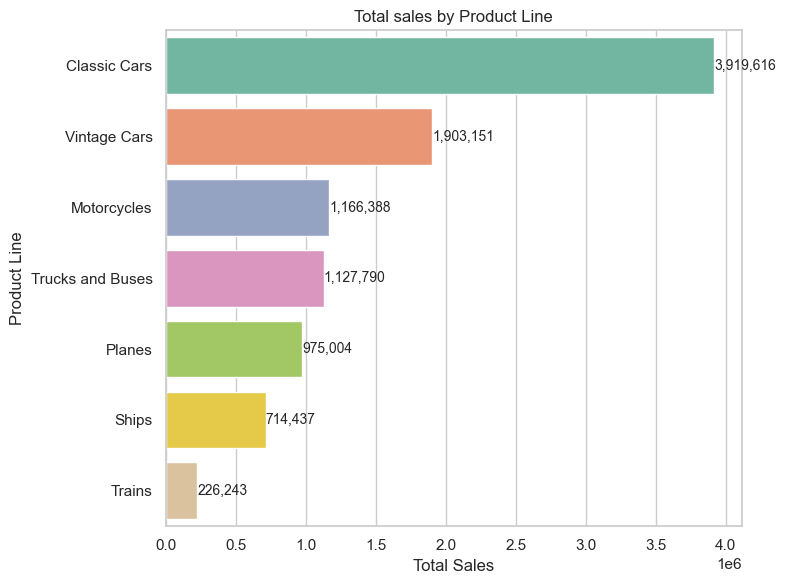

In [104]:
# Group by product line
product_sales = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False).reset_index()
product_sales

# Plot it
plt.figure(figsize=(8,6))
ax = sns.barplot(x='SALES',y='PRODUCTLINE', data=product_sales,hue='PRODUCTLINE',palette='Set2')

# Add values on right side of bars
for bar in ax.patches:
    plt.text( bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():,.0f}',ha='left', va='center',fontsize=10)

plt.title('Total sales by Product Line')
plt.xlabel('Total Sales')
plt.ylabel('Product Line')
plt.tight_layout()
plt.show()

#### Insights:
- **Classic Cars** are the most profitable product line, generating nearly **$40 lakhs** in sales.
- **Vintage Cars** generates around **$19 laks** in revenue.
- **Motorcycles** and **Planes** fall in the mid-range of performance.
- **Trains** are the least generating category around **$2 lakh** revenue.
- This breakdown helps prioritize **inventory planning, marketing, and product development efforts**.


**Sales by Country (Pie Chart)**

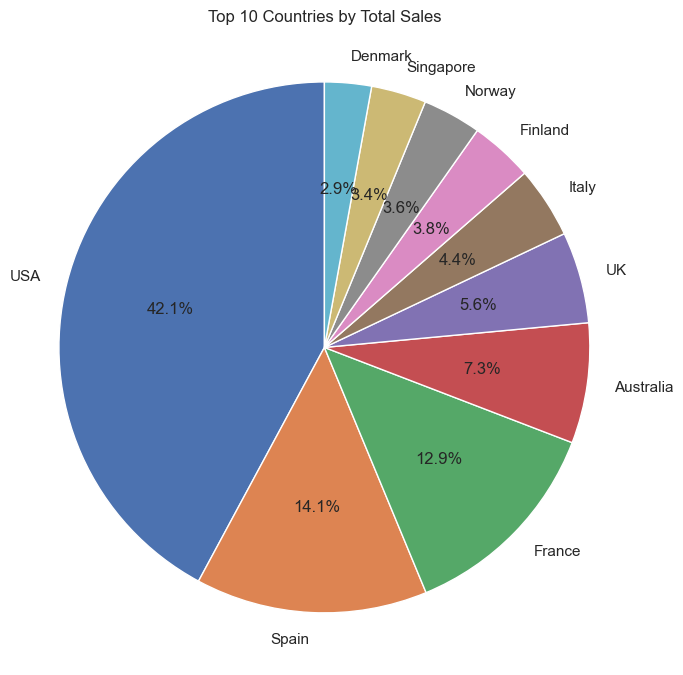

In [105]:
# Group by country
country_sales = df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).reset_index()

top_country_sales = country_sales.head(10)

sales_values = top_country_sales['SALES']
country_labels = top_country_sales['COUNTRY']

plt.figure(figsize=(7,7))
plt.pie(sales_values, labels=country_labels, autopct='%1.1f%%', startangle=90)
plt.title("Top 10 Countries by Total Sales")
plt.axis('equal')  # Equal aspect ratio makes the pie chart a circle
plt.tight_layout()
plt.show()

#### Insights:

- **USA** is the dominant market, accounting for over **42%** of all sales.
- **Spain** and **France** are the next major contributors, with **14.1%** and **12.9%** 
  respectively.
- Other countries like Australia, UK, and Italy also contribute meaningfully, while Denmark and Singapore have smaller shares.
- This geographical breakdown helps focus **sales strategies**, **regional partnerships**, and **resource allocation** in high-performing countries.


**Top 10 Customers by Sales**

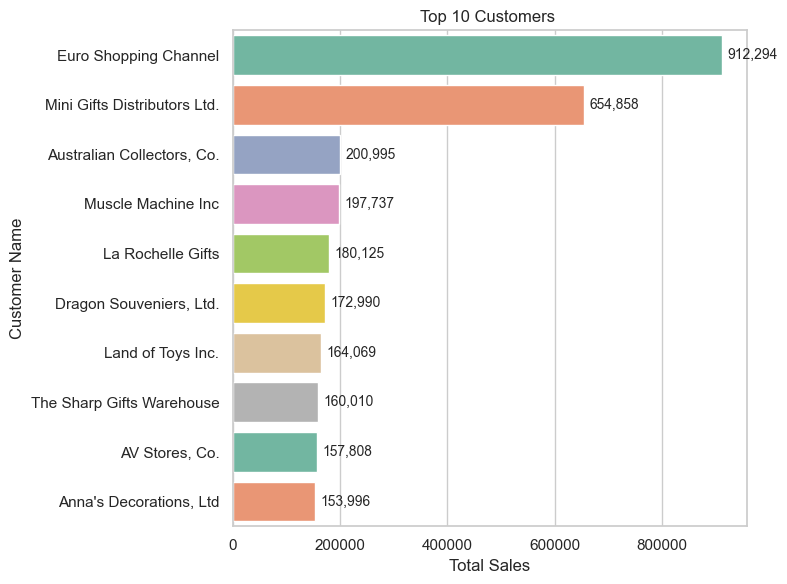

In [106]:
# Group by top 10 customers
top_customers = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(8,6))
ax = sns.barplot(x='SALES',y='CUSTOMERNAME', data=top_customers,hue='CUSTOMERNAME',palette='Set2')
for bar in ax.patches:
    plt.text(bar.get_width() + 10000,bar.get_y() + bar.get_height() / 2, f'{bar.get_width():,.0f}',ha = 'left', va='center', fontsize=10)

plt.title('Top 10 Customers ')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.tight_layout()
plt.show()

#### Insights:

- **Euro Shopping Channel** is the top customer, contributing over **$912,000**, far ahead of others.
- **Mini Gifts Distributors Ltd.** follows with **$654,000+**, also a significant contributor.
- Remaining customers like **Australian Collectors, Co.**, **Muscle Machine Inc**, and **La Rochelle Gifts** each contributed between **$150,000 – $200,000.**
- There’s a steep drop-off after the top 2, indicating that a few clients account for a large portion of revenue.
- These insights can help the company **prioritize client relationships**, develop **loyalty programs**, or target similar customer profiles.

**Monthly Sales Trend**

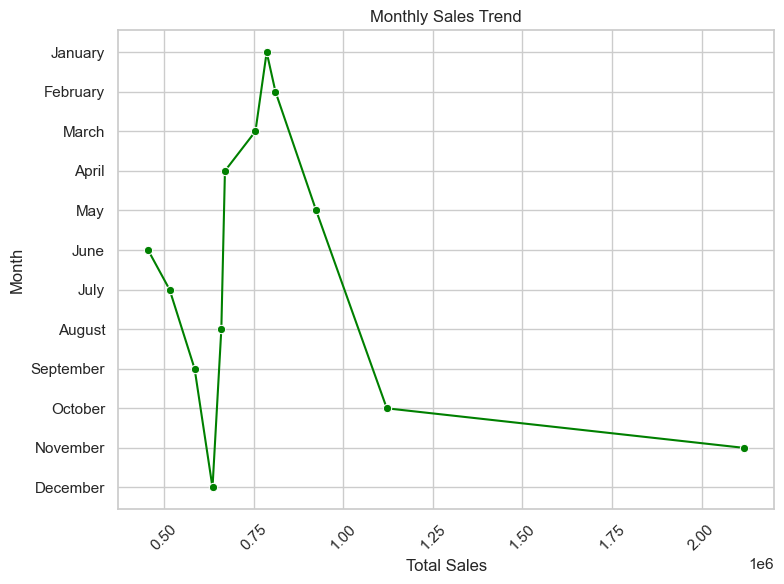

In [107]:
# Group by month
monthly_sales = df.groupby('ORDER_MONTH_NAME')['SALES'].sum()

# Order months correctly
month_order =['January','February','March','April','May','June','July','August','September','October','November','December']

monthly_sales = monthly_sales.reindex(month_order).reset_index()

plt.figure(figsize=(8,6))
sns.lineplot(x='SALES',y='ORDER_MONTH_NAME',data=monthly_sales,marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.xlabel('Total Sales')
plt.ylabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Insights:
- **January** and **February** have the highest sales overall, indicating strong performance in the first quarter — possibly due to year-start restocking or seasonal demand.
- **June to September** show a noticeable dip in sales, suggesting a potential **low-demand or off-season** period.
- **October to December** show a rise again, possibly related to **holiday or year-end orders**.
- This seasonal trend can help the business plan **marketing campaigns**, **inventory stocking**, and **staffing** more efficiently.


**Correlation Between Quantity, Price, and Sales**

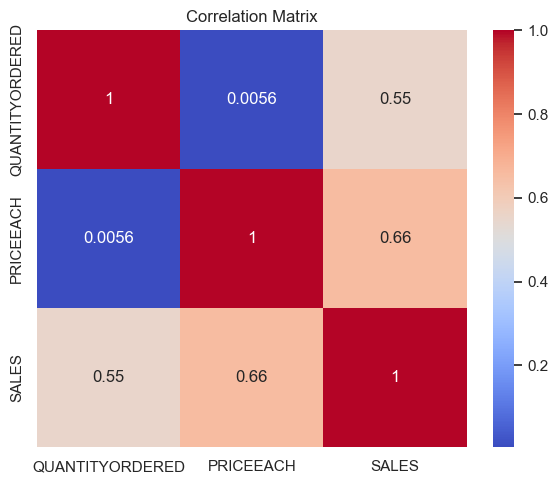

In [108]:
# Correlation matrix
plt.figure(figsize=(6,5))
sns.heatmap(df[['QUANTITYORDERED','PRICEEACH','SALES']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

#### Insights:
- **SALES vs PRICEEACH** → **0.66**: Strong positive correlation. This means that **higher-priced products tend to generate more total sales**, likely because total sales = quantity × price.
- **SALES vs QUANTITYORDERED** → **0.55**: Moderate positive correlation. **Larger order quantities also increase total sales**, but not as strongly as price does.
- **QUANTITYORDERED vs PRICEEACH** → **0.0056**: No significant correlation. This indicates that **unit price is not affected by the quantity ordered**, suggesting fixed pricing or lack of quantity discounts.

These relationships help identify which variables most influence revenue and guide **pricing strategies** and **product focus**.


## Conclusion

The analysis describes:
- 2004 had the highest total sales.
- Classic Cars and Vintage Cars dominate revenue.
- The USA is the largest contributing country.
- Most sales occur in January and February.

Future Steps:
- Build an interactive Streamlit dashboard
- Forecast future sales using time-series modeling
